In [83]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from src.data_loader import RescaleT
from src.data_loader import ToTensor
from src.data_loader import ToTensorLab
from src.data_loader import SalObjDataset
from src.model import U2NET
from src.model import U2NETP

from IPython.display import display
from PIL import Image as Img

from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

In [85]:
# Top 10 most occuring dolphin/whale
trained_list = pd.read_csv("data/train.csv")
(
    trained_list
    .individual_id
    .value_counts()
    .head(10)
)

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
f195c38bcf17    146
ce6e37904aa4    145
ffbb4e585ff2    145
281504409737    143
bc1eb2241633    141
Name: individual_id, dtype: int64

kaggle kernels output acchiko/whale-dolphin-cropped-images-1-3 -p /path/to/dest

In [101]:
from os import listdir
from os.path import isfile, join

file_path = 'data/cropped_images/cropped_train_images/cropped_train_images'
cropped_train_images = [f for f in listdir(file_path) if isfile(join(file_path, f))]
cropped_train_images[1:10]

['7de7f9d4344ae1.jpg',
 '468e0a6d8aa6d0.jpg',
 'd78644e58ffe61.jpg',
 '41caa6e9c43272.jpg',
 '995bfc78f4a4e1.jpg',
 '26bf47ba8947ca.jpg',
 '2bc5b795e2125c.jpg',
 'ca34b19f5e05f8.jpg',
 '3a8bc1bf8c9561.jpg']

In [102]:
minke = (
    trained_list
    .query('individual_id == "37c7aba965a5"')
    .assign(image_name=trained_list['image'].str.replace('.jpg',''))
)
# Using the set
images_to_select = list(set(minke.image.values).intersection(cropped_train_images))

/var/folders/kj/2sm6n_8n4qz6nc6n10vljkbr0000gn/T/ipykernel_4920/2328372292.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .assign(image_name=trained_list['image'].str.replace('.jpg',''))


,image,species,individual_id,image_name
48,0046ceef89b3fc.jpg,minke_whale,37c7aba965a5,0046ceef89b3fc
62,005e53b1b6aada.jpg,minke_whale,37c7aba965a5,005e53b1b6aada
174,0106d276033b78.jpg,minke_whale,37c7aba965a5,0106d276033b78
226,014ba64e8ce8ec.jpg,minke_whale,37c7aba965a5,014ba64e8ce8ec
253,01637f0b588ed8.jpg,minke_whale,37c7aba965a5,01637f0b588ed8
...,...,...,...,...
50006,fac55ca7d54b1f.jpg,minke_whale,37c7aba965a5,fac55ca7d54b1f
50301,fc55728208d315.jpg,minke_whale,37c7aba965a5,fc55728208d315
50373,fca53e45c649d7.jpg,minke_whale,37c7aba965a5,fca53e45c649d7
50468,fd20e39ea4eb03.jpg,minke_whale,37c7aba965a5,fd20e39ea4eb03


In [105]:
# Find matching elements between two list and extract
ls = []
for item in minke.image.values:
    if item in cropped_train_images:
        index = cropped_train_images.index(item)
        ls.append(cropped_train_images[index])
ls[1:10]

['005e53b1b6aada.jpg',
 '0106d276033b78.jpg',
 '014ba64e8ce8ec.jpg',
 '01637f0b588ed8.jpg',
 '019e943e277f9d.jpg',
 '02740665e67443.jpg',
 '0277efcf4294b9.jpg',
 '028fafcac0a36c.jpg',
 '032ba126b3ab1b.jpg']

In [112]:
# Using the set
images = list(set(minke.image.values).intersection(cropped_train_images))

['ddfd4d1aa28247.jpg',
 '799055a6d2a952.jpg',
 'c358659a812830.jpg',
 'a93de8c98f22c3.jpg',
 '9aeb7ba19ff2fd.jpg',
 '10a146202d0539.jpg',
 'cad3cb60072c80.jpg',
 '4d8e00bb02376e.jpg',
 '26f49e7042001f.jpg',
 'b7ea4a7f375a1f.jpg',
 'f7ec333a60b301.jpg',
 'f1b45670e4112b.jpg',
 'f7adc92473219b.jpg',
 '4cd37c15769539.jpg',
 '35d02ae87759aa.jpg',
 '866df5384afc83.jpg',
 '3857cbb37653a1.jpg',
 'cb74875c11810a.jpg',
 '6f4d0c3f813286.jpg',
 'c4368307947d96.jpg',
 'f312525ed653db.jpg',
 '8a3f998dd2bc2f.jpg',
 'a4b994f45b4a8f.jpg',
 '6cedad6fcee593.jpg',
 '817e1aba2e1c4e.jpg',
 '7c460e3f872fc2.jpg',
 '695773ca3c23d1.jpg',
 '7204ef2eec018a.jpg',
 '7188d833cf416b.jpg',
 'd38319273a6f07.jpg',
 '36ce368e8bad91.jpg',
 '7f9cac699b170f.jpg',
 '50444d983e1664.jpg',
 '2778fe05a122d9.jpg',
 '0d889f7560946d.jpg',
 '08a8f393e99633.jpg',
 '46fd13c3e0107d.jpg',
 '4e157efa54513b.jpg',
 'fac55ca7d54b1f.jpg',
 '9eae156a43f028.jpg',
 '1245788c6d2dcd.jpg',
 '25d8a0ccb115e0.jpg',
 '74a3bce30c1b47.jpg',
 '098c074ce

In [81]:
[file_path + '/' + image + '.png' for image in images]

['data/cropped_images/cropped/train_images/0202499d0f213c.png',
 'data/cropped_images/cropped/train_images/02230215614250.png']

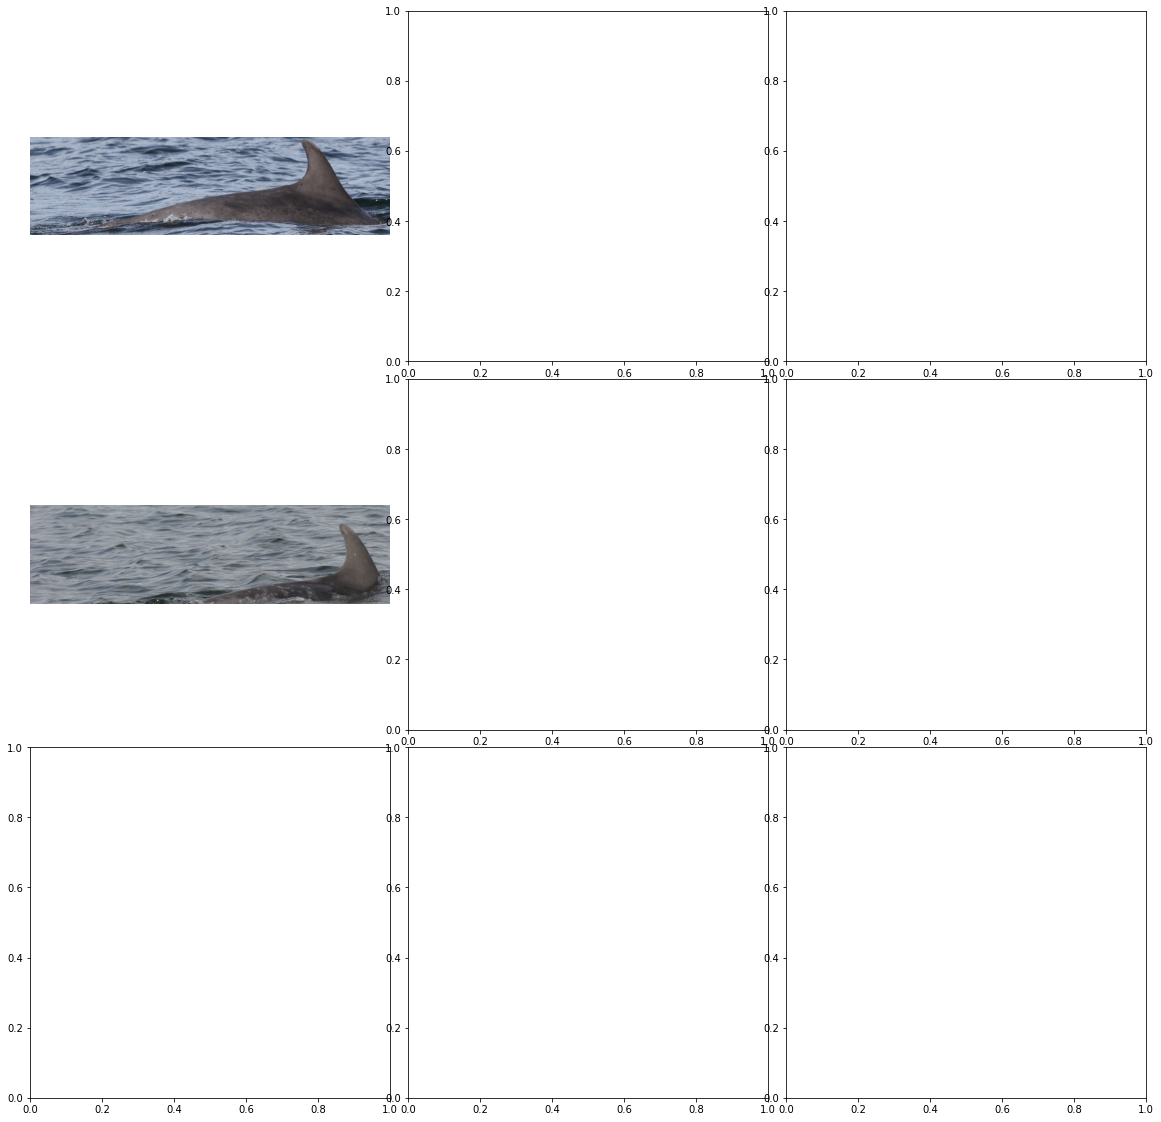

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))

img_to_draw = [input_path + '/' + image + '.png' for image in images]
for idx, img in enumerate(img_to_draw):
    i = idx % 3 
    j = idx // 3
    image = Img.open(img)
    iar_shp = np.array(image).shape
    axes[i, j].axis('off')
    axes[i, j].imshow(image)
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()